Downloading...
From: https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/Customers.csv
100%|██████████| 8.54k/8.54k [00:00<00:00, 17.5MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/Products.csv
100%|██████████| 4.25k/4.25k [00:00<00:00, 8.48MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/Transactions.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 18.2MB/s]
<ipython-input-13-c015528b2315>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data, x='Region', palette='pastel', edgecolor='black')



Columns in Products dataset:
 Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

Columns in merged dataset:
 Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')
Column 'Price' not found in merged_data. Check the Products dataset for the correct column name.


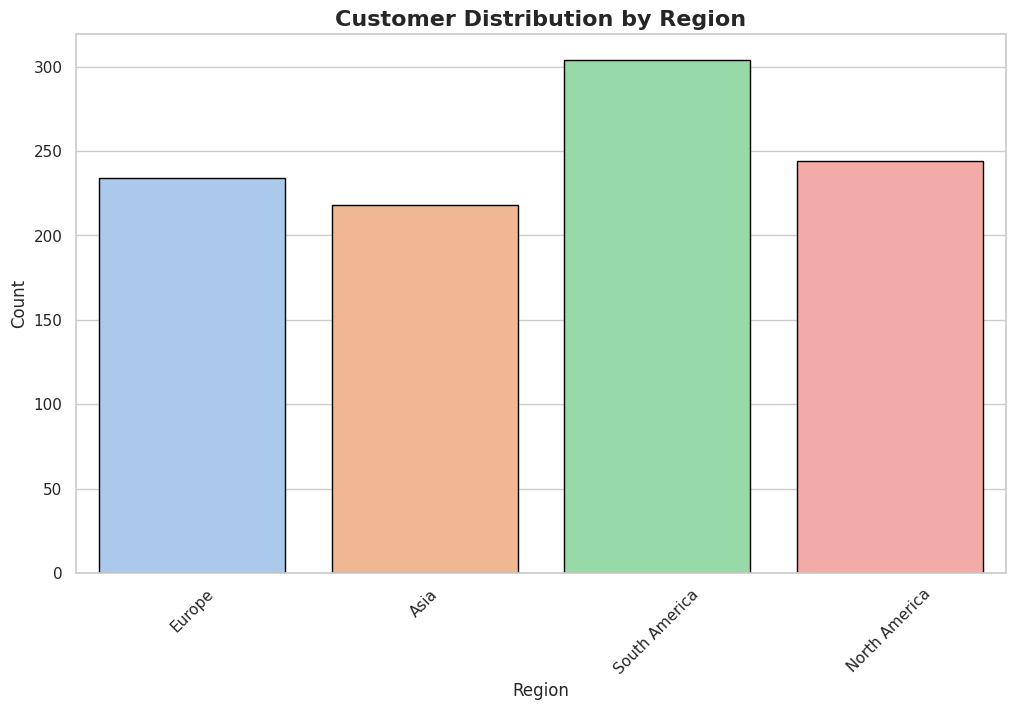

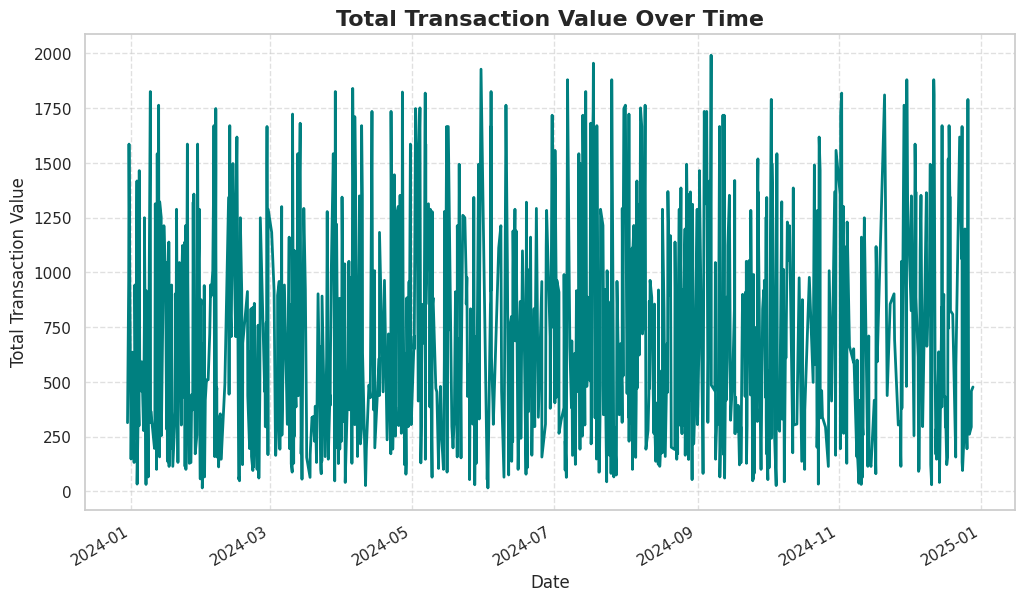

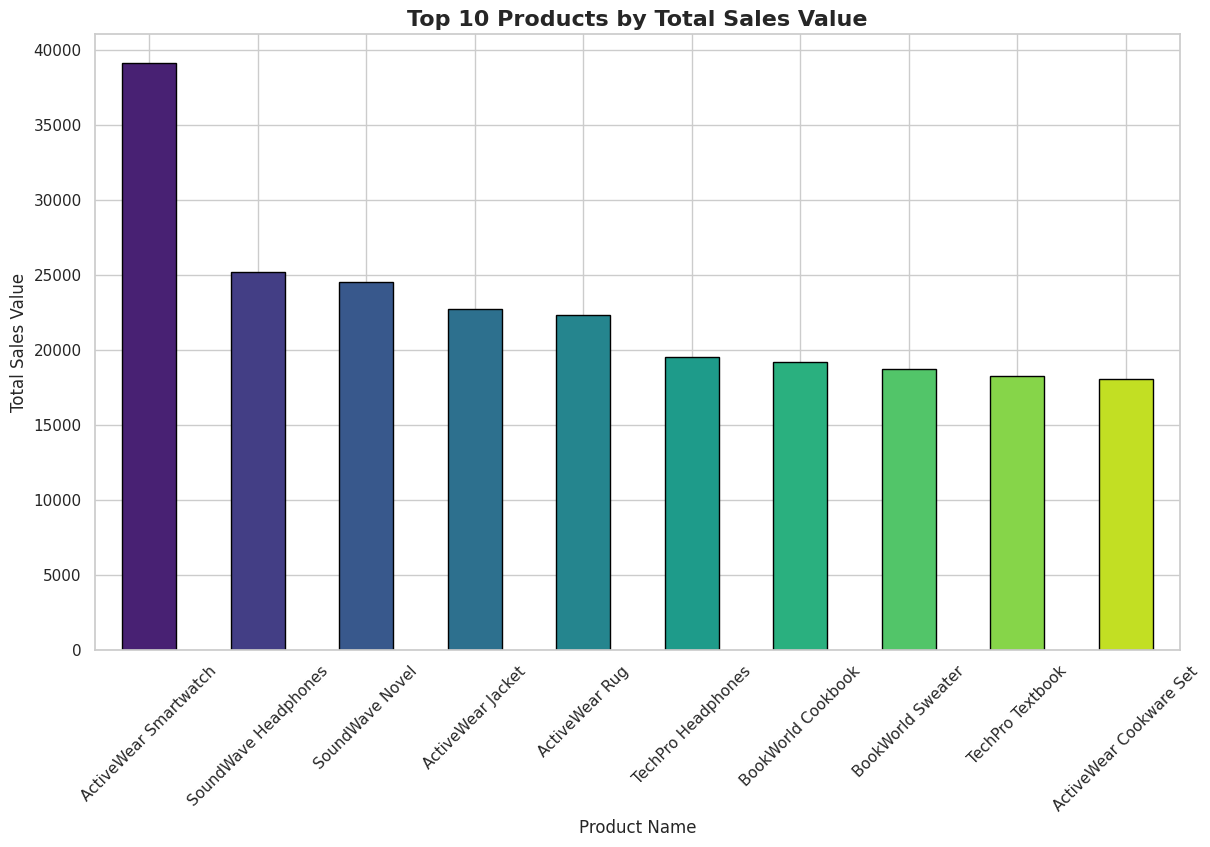

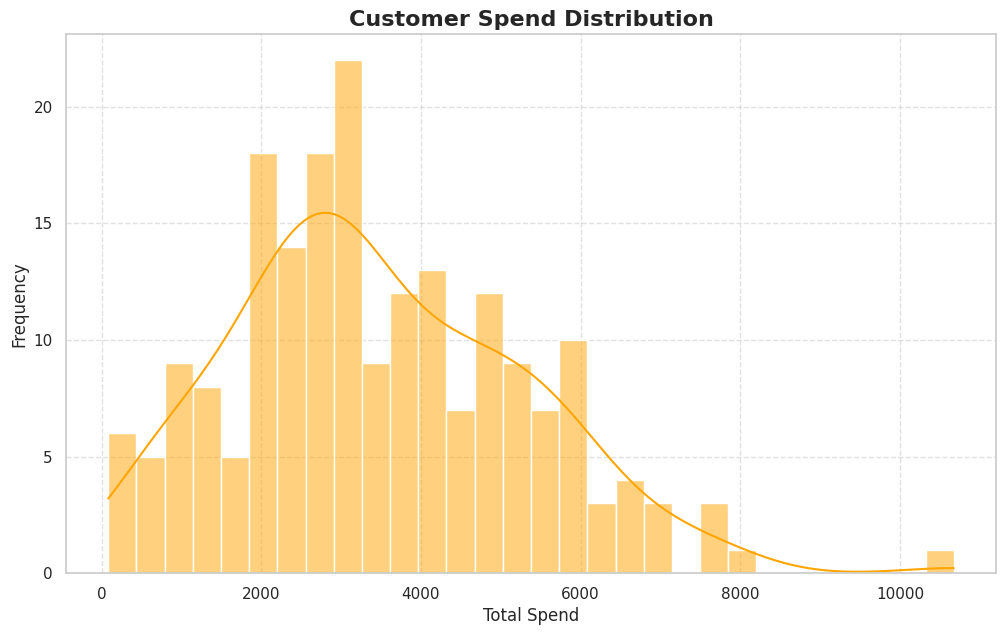

Insight 1: Region Distribution:
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64

Insight 2: Top 5 Products by Total Sales Value:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64

Insight 3: Top 5 Customers by Total Spend:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64



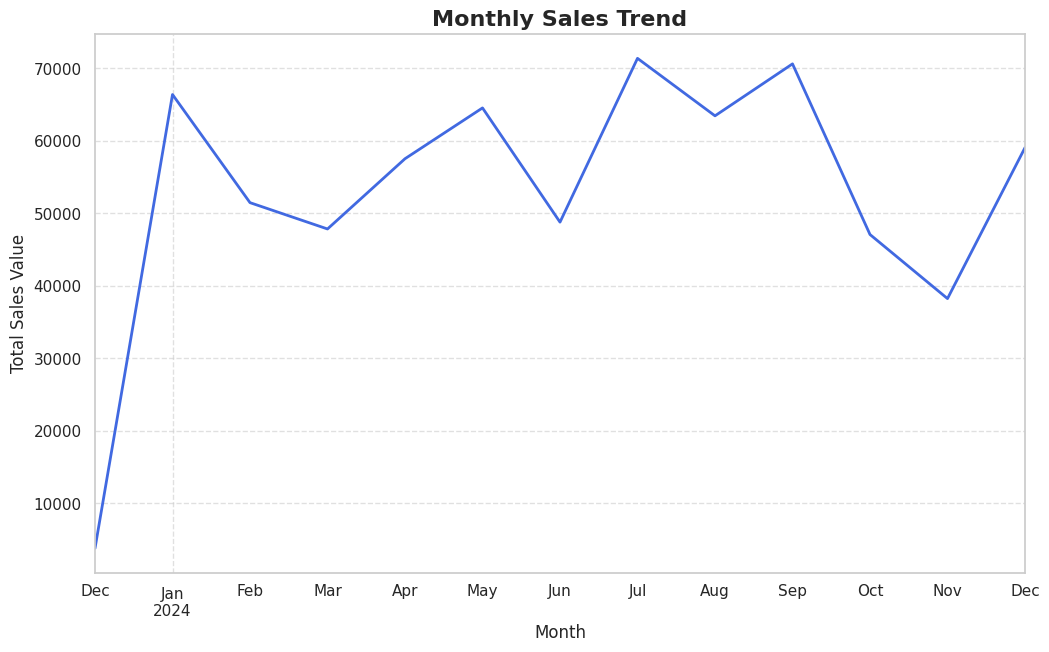

Column 'Price' not found in merged_data. Check the Products dataset for the correct column name.

Final check: Column names of the merged dataset:
 Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')


In [13]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Google Drive file links (shared publicly)
customers_url = 'https://drive.google.com/uc?export=download&id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
products_url = 'https://drive.google.com/uc?export=download&id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
transactions_url = 'https://drive.google.com/uc?export=download&id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

# Download the datasets
gdown.download(customers_url, 'Customers.csv', quiet=False)
gdown.download(products_url, 'Products.csv', quiet=False)
gdown.download(transactions_url, 'Transactions.csv', quiet=False)

# Load the datasets into pandas DataFrames
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Data Cleaning
customers.columns = customers.columns.str.strip()
products.columns = products.columns.str.strip()
transactions.columns = transactions.columns.str.strip()

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Drop duplicates if any
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

# Check the column names in the Products dataset before merging
print("\nColumns in Products dataset:\n", products.columns)

# Rename the price column if necessary
if 'Price' not in products.columns:
    # Example: Rename the column if it's named differently
    products = products.rename(columns={'ProductPrice': 'Price'})  # Adjust this based on actual column name

# Merge the datasets on CustomerID and ProductID
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')

# Check column names after merging
print("\nColumns in merged dataset:\n", merged_data.columns)

# Set the style for plots
sns.set(style="whitegrid", palette="Set2")

# 1. Distribution of Product Prices (Colorful and engaging)
if 'Price' in merged_data.columns:
    plt.figure(figsize=(12, 7))
    sns.histplot(merged_data['Price'], bins=30, kde=True, color='purple')
    plt.title('Distribution of Product Prices', fontsize=16, fontweight='bold')
    plt.xlabel('Price', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print("Column 'Price' not found in merged_data. Check the Products dataset for the correct column name.")

# 2. Customer Region Distribution (Vibrant)
plt.figure(figsize=(12, 7))
sns.countplot(data=merged_data, x='Region', palette='pastel', edgecolor='black')
plt.title('Customer Distribution by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 3. Total Value per Transaction over Time (Time Series)
plt.figure(figsize=(12, 7))
merged_data.groupby('TransactionDate')['TotalValue'].sum().plot(color='teal', lw=2)
plt.title('Total Transaction Value Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Transaction Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 4. Top 10 Products by Total Sales Value (Colorful bar chart)
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 8))
top_products.plot(kind='bar', color=sns.color_palette("viridis", len(top_products)), edgecolor='black')
plt.title('Top 10 Products by Total Sales Value', fontsize=16, fontweight='bold')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# 5. Customer Segmentation by Total Spend (Appealing distribution)
customer_spend = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.histplot(customer_spend, bins=30, kde=True, color='orange')
plt.title('Customer Spend Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Total Spend', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Insight 1: Region Distribution (Insights with bold titles)
region_counts = merged_data['Region'].value_counts()
print(f"Insight 1: Region Distribution:\n{region_counts}\n")

# Insight 2: Most Popular Products
top_5_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(f"Insight 2: Top 5 Products by Total Sales Value:\n{top_5_products}\n")

# Insight 3: High-value Customers
top_5_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(f"Insight 3: Top 5 Customers by Total Spend:\n{top_5_customers}\n")

# Insight 4: Seasonal Sales Trend (Line plot with vibrant color)
monthly_sales = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
plt.figure(figsize=(12, 7))
monthly_sales.plot(kind='line', color='royalblue', lw=2)
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Insight 5: Price Sensitivity (Colorful bar chart)
if 'Price' in merged_data.columns:
    price_distribution = merged_data['Price'].value_counts().sort_index()
    plt.figure(figsize=(12, 7))
    price_distribution.plot(kind='bar', color=sns.color_palette("coolwarm", len(price_distribution)), edgecolor='black')
    plt.title('Product Price Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('Price', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()
else:
    print("Column 'Price' not found in merged_data. Check the Products dataset for the correct column name.")

# Final check for column names
print("\nFinal check: Column names of the merged dataset:\n", merged_data.columns)
